# Batch Transformation

With multiple images **of the same size**, you can batch transform them

In [37]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
from mpl_toolkits.axes_grid1 import ImageGrid
from skimage.util import view_as_blocks

## Read Image and Split them

We split the image into 4 **125 x 125 x 3** images

In [38]:
ar = imread("../../../data/image.jpg")[:250, :250]
ars = view_as_blocks(ar, (125, 125, 3)).reshape(-1, 125, 125, 3)

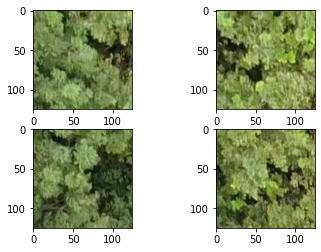

In [39]:
fig = plt.figure()
fig.add_subplot(221)
plt.imshow(ars[0])
fig.add_subplot(222)
plt.imshow(ars[1])
fig.add_subplot(223)
plt.imshow(ars[2])
fig.add_subplot(224)
plt.imshow(ars[3])

## Inspect split array shape

Note that the shape expected is **B x H x W x C**.

- B: Batch
- H: Height
- W: Width
- C: Channel

In [40]:
ars.shape

(4, 125, 125, 3)

## Transform & Plot Results

Each image is separately transformed.

There is slight speedup by doing batch processing, however, it's minimal and mainly for convenience.

GLCM Progress: 100%|██████████| 680k/680k [00:02<00:00, 336k Cells/s] 


Text(0.5, 0.98, 'Padded GLCM Features for 1st Image (Cube Rooted for visibility)')

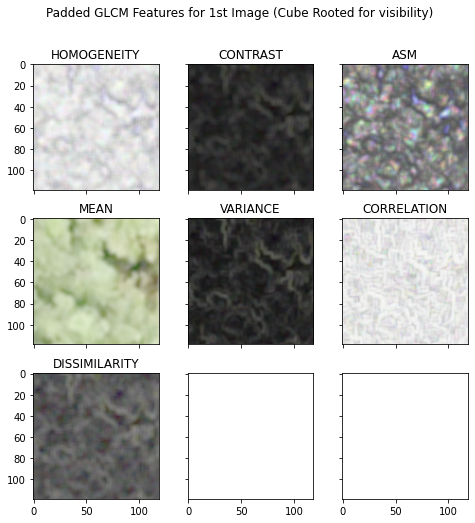

In [41]:
from glcm_cupy import glcm

radius = 2
step_size = 1
gs = glcm(ars, bin_from=256, bin_to=16, radius=radius, step_size=step_size)
# Plot in a grid
fig = plt.figure(figsize=(12, 8))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(3, 3),
                 axes_pad=0.4)

for ax, f_ix, title in zip(grid, range(gs.shape[-1]),
                           ("HOMOGENEITY", "CONTRAST", "ASM", "MEAN",
                            "VARIANCE", "CORRELATION", "DISSIMILARITY"), ):
    ax.imshow(gs[0][..., f_ix] ** (1 / 3))
    ax.set_title(title)
fig.suptitle('Padded GLCM Features for 1st Image (Cube Rooted for visibility)')

Text(0.5, 0.98, 'Padded GLCM Features for 2nd Image (Cube Rooted for visibility)')

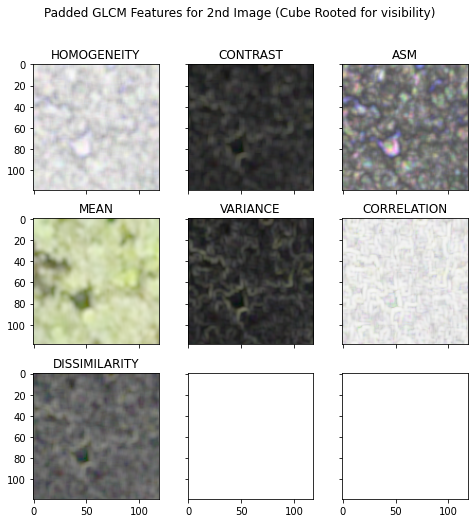

In [42]:
# Plot in a grid
fig = plt.figure(figsize=(12, 8))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(3, 3),
                 axes_pad=0.4)

for ax, f_ix, title in zip(grid, range(gs.shape[-1]),
                           ("HOMOGENEITY", "CONTRAST", "ASM", "MEAN",
                            "VARIANCE", "CORRELATION", "DISSIMILARITY"), ):
    ax.imshow(gs[1][..., f_ix] ** (1 / 3))
    ax.set_title(title)
fig.suptitle('Padded GLCM Features for 2nd Image (Cube Rooted for visibility)')

## Summary

- `glcm-cupy` works with batched images, for convenience and a small speed up!
